# **AP157 Machine Learning Lab Assignment**
## Module A1: Regression -- Overfitting, Underfitting, and Cross-Validation

_Instructions_: Answer each part of the assignment as completely as you can. Discuss **all** your code and results as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points** (Parts 1 and 2 are worth 20 and 80 points, respectively).

_Credits_: This assignment is based on Chapter 8.11 of “Statistics, Data Mining, and Machine Learning in Astronomy” (SDMMLA) by Zeljko Ivezic et al.

### Student Information

_Full Name (Last Name, First Name)_: Quiamjot, Allyn Christian\
_Student No._: 2021-07198\
_Section_: TX-2

### Submission Information

_Date and Time Submitted (most recent upload)_:

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name: ALLYN CHRISTIAN QUIAMJOT**

### Grading Information (c/o Instructor)

TOTAL SCORE: **[]**/100

Score breakdown:
* Part 1 - []/20
* Part 2 - []/80

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_

#### PART 1 - Generate data set *(20 points)*

1. Generate a toy data set with 100 regularly-spaced points and as described by Eq. 8.75-- a simple model where $x$ and $y$ satisfy the following:
$$ 0 \le x_i \le 3 $$
$$ y_i = x_i \sin(x_i) + \epsilon_i $$
where the noise is drawn from a normal distribution $\epsilon_i \sim \rm{N}(0, 0.1)$. *(10 points)*  

2. Plot your toy data set (Refer to Fig. 8.12 for comparison). *(10 points)*


PART 2 - Apply cross-validation *(80 points)*

Recreate the top panel of Figure 8.14: rms error vs. polynomial degree for the training set and cross-validation set. To do this, you will perform the ff. steps:

1. Split the data set into training, cross-validation, and test sets with 50%, 25% and 25% ratio. You can use sklearn library's model_selection.train_test_split function [(link)](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). *(20 pts.)*
2. Get the best-fit curve for polynomial degrees $d=0$ to 14 for the training set. You can use numpy library's polyfit function [(link)](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html). *(30 pts.)*
3. Get the rms errors for both the training and cross-validation sets (for the best-fit curve from Step 2). *(10 pts.)*
4. Plot rms errors for both the training and cross-validation sets against polynomial degree $d$ (as in Fig. 8.14). *(20 pts.)*


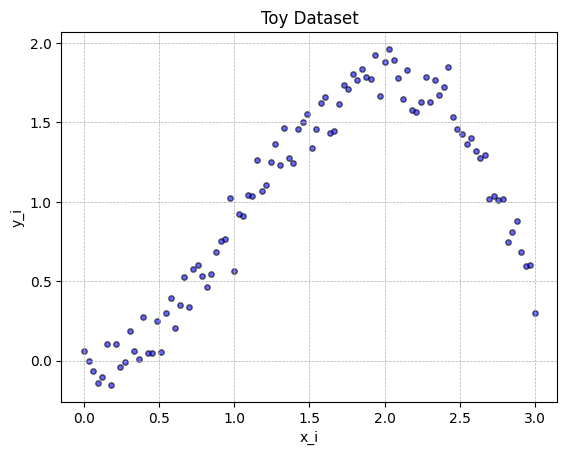

In [213]:
import numpy as np
import matplotlib.pyplot as plt 

n = 100
x_points = np.linspace(0,3,n)
y_points = x_points * np.sin(x_points) + np.random.normal(0,0.1,size=n)
plt.scatter(x_points, y_points, color = 'blue', alpha = 0.6, edgecolor='black', s = 15)
plt.title('Toy Dataset')
plt.xlabel('x_i')
plt.ylabel('y_i')
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.show()

In [214]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_points,y_points, train_size=0.5)
x_val, x_test, y_val, y_test = train_test_split(x_test,y_test, train_size=0.5)

dd = []
for i in range(len(x_train)):
    dd.append([x_train[i],y_train[i]])

dd.sort()
# print(x_train)
# print(x_val)
# print(x_test)

[0.4476306603601739, 0.22578884410879904, 0.09717946999421992, 0.09505300115709307, 0.09412090948596182, 0.09375070224011273, 0.09352300388257735, 0.09156460570182885, 0.09066345713153004, 0.0895697334805717, 0.08557540732689255, 0.08293723594164737, 0.08271707999180726, 0.08218539021124967]


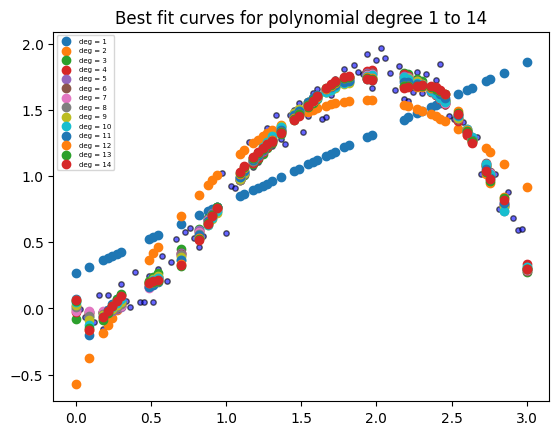

In [215]:
rmse = []; rmse2=[]

plt.scatter(x_points, y_points, color = 'blue', alpha = 0.6, edgecolor='black', s = 15)

for i in range(1,15):
    k = np.polyfit(x_train,y_train,i)
    p = np.poly1d(k)
    x_curve = np.linspace(min(x_train),max(x_train),len(x_train))
    y_curve = p(x_train)

    plt.scatter(x_train,y_curve,label = 'deg = '+str(i))
    plt.title('Best fit curves for polynomial degree 1 to 14')
    plt.legend(loc='upper left',fontsize=5)

    rmse.append(np.sqrt(np.sum(((y_train-y_curve))**2)/len(x_train)))
    rmse2.append(np.sqrt(np.sum(((y_val-p(x_val)))**2)/len(x_val)))
    
    
print(rmse)

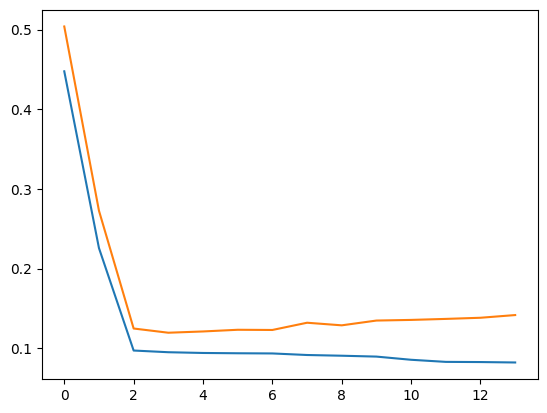

In [216]:
plt.plot(rmse)
plt.plot(rmse2)


In [217]:
# aa = [9,1,5,2,3,4,6,7,8]
# bb = [10,20,30,40,50,60,70,80,90]

# cc = []
# for i in range(len(aa)):
#     cc.append([aa[i],bb[i]])

# print(cc)
# cc.sort()
# print(cc)
# print([pair[0] for pair in cc])
# print([pair[1] for pair in cc])

dd = []
for i in range(len(x_train)):
    dd.append([x_train[i],y_train[i]])

dd.sort()
# print(dd)
print(dd)

x_train_sorted = [pair[0] for pair in dd]

[[0.0, 0.05932048268374667], [0.09090909090909091, -0.1440236186939482], [0.18181818181818182, -0.15271479562510015], [0.21212121212121213, 0.10098096201476067], [0.24242424242424243, -0.04301880222237982], [0.2727272727272727, -0.006328392383947223], [0.30303030303030304, 0.18580950038363625], [0.48484848484848486, 0.24638843812874253], [0.5151515151515151, 0.05070188050396396], [0.5454545454545454, 0.29863202804456396], [0.696969696969697, 0.336160031909849], [0.8181818181818182, 0.4609528013593708], [0.8787878787878788, 0.6810728894615923], [0.9090909090909092, 0.7532865332244407], [0.9393939393939394, 0.7653552759791299], [1.0909090909090908, 1.0403219705971543], [1.1212121212121213, 1.0356947017080418], [1.1818181818181819, 1.068542242260102], [1.2121212121212122, 1.1050220617893143], [1.2424242424242424, 1.2494937343799961], [1.2727272727272727, 1.36540404538933], [1.303030303030303, 1.2297612984314839], [1.3636363636363638, 1.2763440595097375], [1.4545454545454546, 1.50079025154

[0.4476306603601739, 0.22578884410879904, 0.09717946999421992, 0.09505300115709307, 0.09412090948596182, 0.09375070224011273, 0.09352300388257735, 0.09156460570182885, 0.09066345713153004, 0.0895697334805717, 0.08557540732689255, 0.08293723594164737, 0.08271707999180726, 0.08218539021124967]


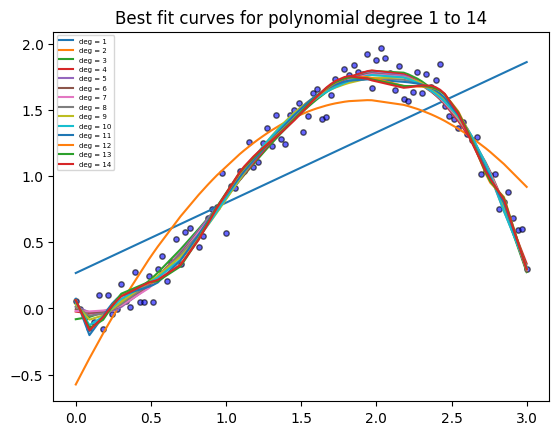

In [218]:
plt.scatter(x_points, y_points, color = 'blue', alpha = 0.6, edgecolor='black', s = 15)
rmsee = []; rmsee2 = []
for i in range(1,15):
    k = np.polyfit(x_train,y_train,i)
    p = np.poly1d(k)
    x_curve = np.linspace(min(x_train),max(x_train),len(x_train))
    y_curve = p(x_train_sorted)

    plt.plot(x_train_sorted,y_curve,label = 'deg = '+str(i))
    plt.title('Best fit curves for polynomial degree 1 to 14')
    plt.legend(loc='upper left',fontsize=5)

    rmsee.append(np.sqrt(np.sum(((y_train-p(x_train)))**2)/len(x_train)))
    rmsee2.append(np.sqrt(np.sum(((y_val-p(x_val)))**2)/len(x_val)))
    
print(rmse)

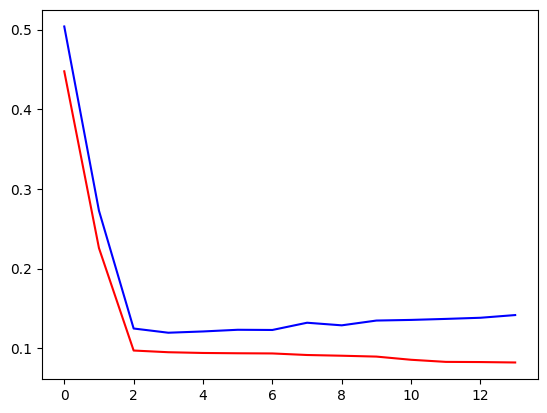

In [219]:
plt.plot(rmsee, color='r')
plt.plot(rmsee2, color ='blue')